# dataset clean (1444 x 2 = 2888) 2308 + 580 optimasi hyperparameter + augmentasi zoom in dan rotate

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import cv2
import shutil
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
# Lokasi dataset asli
base_dir = r'..\..\dataset\Dataset 1444'
gabungan_dir = r'..\..\dataset\Dataset Ori + Aug\gabungan'
test_dir = r'..\..\dataset\Dataset Ori + Aug\zoom+rotate\test'
train_dir = r'..\..\dataset\Dataset Ori + Aug\zoom+rotate\train'

# if not os.path.exists(gabungan_dir):
#     os.makedirs(gabungan_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

In [ ]:
# # Menyimpan augmentasi gambar rotasi + zoom range train
# datagen = ImageDataGenerator(rotation_range=30, zoom_range=0.2)

# for label in os.listdir(base_dir):
#     label_path = os.path.join(base_dir, label)
    
#     if os.path.isdir(label_path):
#         # Buat direktori label dalam rotate_dir jika belum ada
#         gabungan_label_dir = os.path.join(gabungan_dir, label)
#         if not os.path.exists(gabungan_label_dir):
#             os.makedirs(gabungan_label_dir)
        
#         for file in os.listdir(label_path):
#             img_path = os.path.join(label_path, file)

#             # Load gambar
#             img = load_img(img_path)
#             img_array = img_to_array(img)
#             img_array = np.expand_dims(img_array, axis=0)

#             # Hasil augmentasi
#             aug_iter = datagen.flow(img_array, batch_size=1)

#             # Simpan hasil augmentasi ke file dalam folder sesuai labelnya
#             for i in range(1): 
#                 aug_img = next(aug_iter)[0].astype(np.uint8)
#                 aug_img_pil = array_to_img(aug_img)

#                 # Simpan gambar hasil augmentasi
#                 save_path = os.path.join(gabungan_label_dir, f'aug_{file}')
#                 aug_img_pil.save(save_path)

# print("Augmentasi selesai dan gambar berhasil disimpan.")

Augmentasi selesai dan gambar berhasil disimpan.


In [ ]:
# # menyalin gambar train ke gabungan

# # Loop melalui setiap folder label di train_dir
# for label in os.listdir(base_dir):
#     label_path = os.path.join(base_dir, label)
    
#     # Pastikan ini adalah direktori
#     if os.path.isdir(label_path):
#         # Buat direktori label di gabungan_dir jika belum ada
#         gabungan_label_dir = os.path.join(gabungan_dir, label)
#         if not os.path.exists(gabungan_label_dir):
#             os.makedirs(gabungan_label_dir)
        
#         # Loop melalui setiap gambar di folder label
#         for image_name in os.listdir(label_path):
#             image_path = os.path.join(label_path, image_name)
            
#             # Salin gambar ke direktori gabungan
#             shutil.copy(image_path, gabungan_label_dir)

# print("Semua gambar dari train_dir telah disalin ke gabungan_dir.")

Semua gambar dari train_dir telah disalin ke gabungan_dir.


Jumlah data Kawung: 722
Jumlah data Mega Mendung: 722
Jumlah data Parang: 722
Jumlah data Truntum: 722
Jumlah Dataset Rotate: 2888


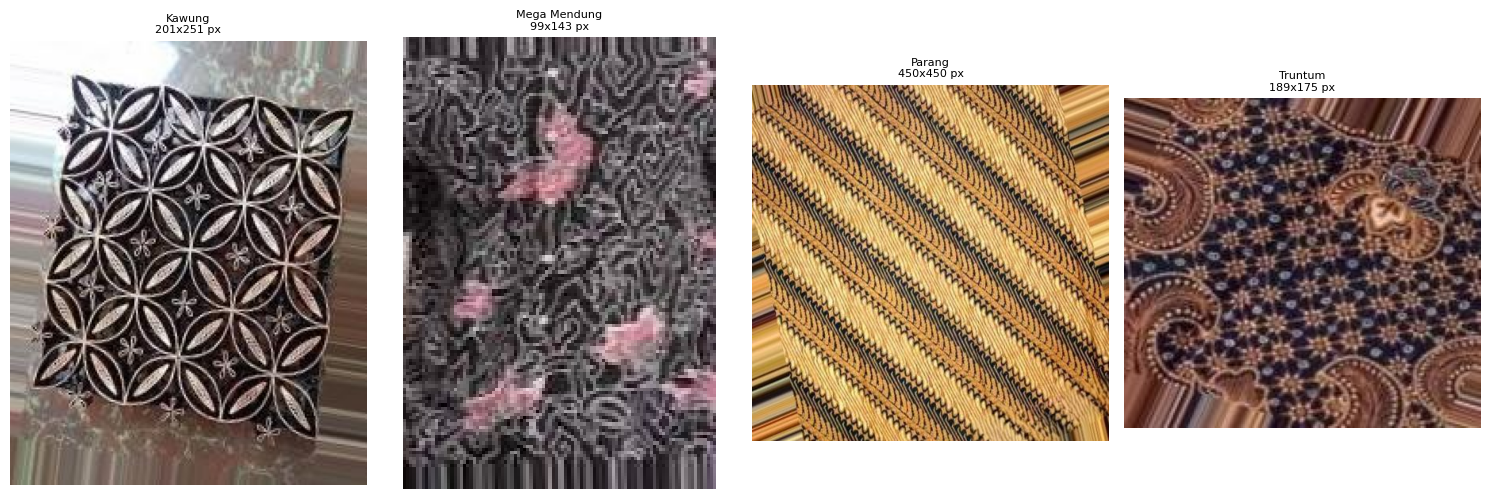

In [22]:
## Menampilkan Jumlah Dataset dari setiap kelas
total_dataset = 0
dataset_dir = gabungan_dir
folders = [folder for folder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))]
# Check if folders is empty and handle it
if not folders:
    print("No folders found in the dataset directory. Please check the path.")
else:
    fig, axes = plt.subplots(1, len(folders), figsize=(15, 5))

    for i, folder in enumerate(folders):
        folder_path = os.path.join(dataset_dir, folder)
        image_count = len(os.listdir(folder_path))
        total_dataset += image_count
        print(f"Jumlah data {folder}: {image_count}")

        # Menampilkan foto secara acak dari setiap folder
        try:
            image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
            if image_files:
                random_image = random.choice(image_files)
                image_path = os.path.join(folder_path, random_image)
                img = Image.open(image_path)
                width, height = img.size

                # Menampilkan gambar di subplot horizontal
                axes[i].imshow(img)
                axes[i].set_title(f"{folder}\n{width}x{height} px", fontsize=8)
                axes[i].axis('off')
            else:
                print(f"Tidak ada gambar yang ditemukan di folder '{folder}'")
        except Exception as e:
            print(f"Error menampilkan gambar dari folder '{folder}': {e}")

    print(f"Jumlah Dataset Rotate: {total_dataset}")
    plt.tight_layout()
    plt.show()

In [ ]:
# # Membagi data train dan test setelah augmentasi data

# # Membuat folder untuk data train dan test jika belum ada
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Mendapatkan daftar kelas (subfolder dalam dataset)
# classes = [d for d in os.listdir(gabungan_dir) if os.path.isdir(os.path.join(gabungan_dir, d))]

# # Membagi data per kelas
# for cls in classes:
#     cls_path = os.path.join(gabungan_dir, cls)

#     # Membuat folder kelas di train dan test
#     os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
#     os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

#     # Mendapatkan daftar file gambar dalam kelas
#     images = os.listdir(cls_path)

#     # Membagi gambar menjadi 80% train dan 20% test
#     train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

#     # Memindahkan file ke folder train dan test
#     for img in train_imgs:
#         shutil.move(os.path.join(cls_path, img), os.path.join(train_dir, cls, img))
#     for img in test_imgs:
#         shutil.move(os.path.join(cls_path, img), os.path.join(test_dir, cls, img))

# print("Pembagian dataset selesai.")

Pembagian dataset selesai.


In [3]:
# Fungsi preprocessing menggunakan CLAHE
# CLAHE akan meningkatkan kontras gambar sehingga fitur lebih terlihat
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
def preprocess_image(image):
    # Konversi nilai dari 0-1 ke 0-255 dan ubah tipe data ke uint8
    image = (image * 255).astype(np.uint8)
    
    # Konversi ke LAB color space
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    
    # Pisahkan channel L, A, dan B
    l, a, b = cv2.split(lab)
    
    # Terapkan CLAHE pada channel L (grayscale)
    l = clahe.apply(l)
    
    # Gabungkan kembali ke LAB
    lab = cv2.merge((l, a, b))
    
    # Konversi kembali ke RGB
    image = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    
    # Normalisasi kembali ke 0-1
    image = image / 255.0
    return image


In [35]:
# Ambil semua file gambar dari dataset asli
file_paths = []
labels = []

# Ambil file dari train_dir (data asli)
for label in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_paths.append(os.path.join(label_path, file))
            labels.append(label)

# Map label ke integer
unique_labels = sorted(set(labels))
label_map = {label: idx for idx, label in enumerate(unique_labels)}
integer_labels = np.array([label_map[label] for label in labels])

print(f"Jumlah total gambar (asli + rotate): {len(file_paths)}")
print(labels)
print(label_map)
print(integer_labels)
print(len(unique_labels))

Jumlah total gambar (asli + rotate): 2308
['Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung', 'Kawung

In [4]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
BATCH_SIZE = 32
COLOR_CHANNELS = 3

In [5]:
# # Fungsi generator data
# def data_generator(file_paths, labels, batch_size):
#     while True:
#         indices = np.arange(len(file_paths))
#         np.random.shuffle(indices)

#         for i in range(0, len(file_paths), batch_size):
#             batch_indices = indices[i:i + batch_size]
#             batch_images = []
#             batch_labels = []

#             for idx in batch_indices:
#                 img = load_img(file_paths[idx], target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
#                 img = img_to_array(img)
#                 img = preprocess_image(img)
#                 batch_images.append(img)
#                 batch_labels.append(labels[idx])

#             batch_images = np.array(batch_images)
#             batch_labels = to_categorical(np.array(batch_labels), num_classes=len(unique_labels))

#             yield batch_images, batch_labels

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_image
)

In [6]:
test_generator = ImageDataGenerator(preprocessing_function=preprocess_image).flow_from_directory(
    directory=test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 580 images belonging to 4 classes.



🚀 Training Fold 1 😌

Found 1846 validated image filenames belonging to 4 classes.
Found 462 validated image filenames belonging to 4 classes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 58/115 ━━━━━━━━━━━━━━━━━━━━ 2:14 2s/step - accuracy: 0.4252 - loss: 1.4417

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


115/115 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.4757 - loss: 1.2798 - val_accuracy: 0.8683 - val_loss: 0.5471 - learning_rate: 1.0000e-04
Epoch 2/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.7488 - loss: 0.6196 - val_accuracy: 0.9040 - val_loss: 0.2814 - learning_rate: 1.0000e-04
Epoch 3/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8429 - loss: 0.4428 - val_accuracy: 0.9397 - val_loss: 0.1956 - learning_rate: 1.0000e-04
Epoch 4/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.8945 - loss: 0.3028 - val_accuracy: 0.9442 - val_loss: 0.1606 - learning_rate: 1.0000e-04
Epoch 5/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9266 - loss: 0.2204 - val_accuracy: 0.9576 - val_loss: 0.1401 - learning_rate: 1.0000e-04
Epoch 6/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.9362 - loss: 0.1638 - val_accuracy: 0.9554 - val_loss: 0.1216 - learning_rate: 1.0000e-04
Epoch 7/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.96

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['accuracy'], history.history['val_accuracy']], vert=True, patch_artist=True,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['loss'], history.history['val_loss']], vert=True, patch_artist=True,


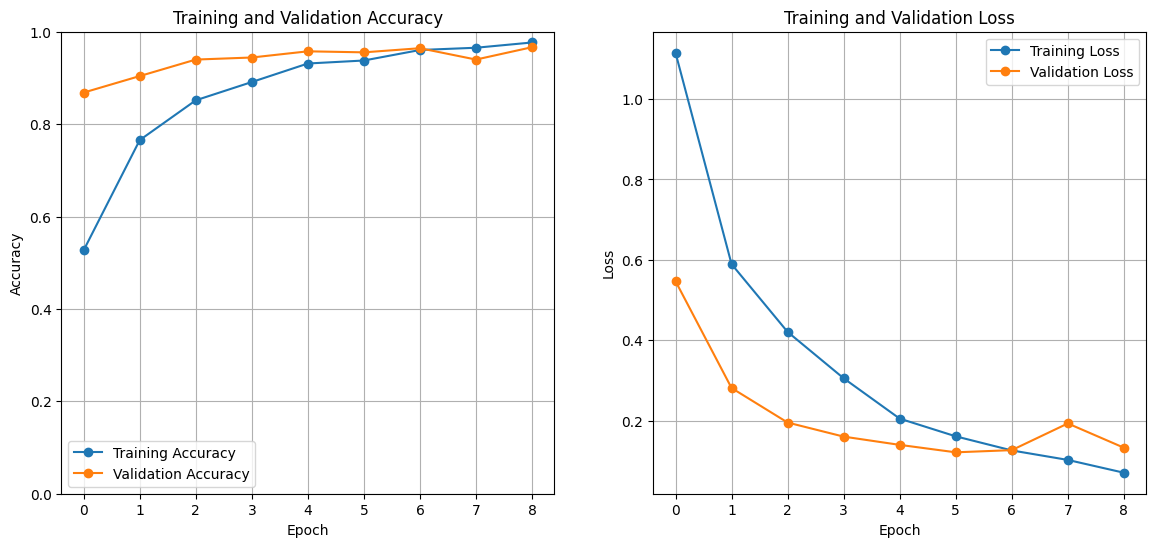

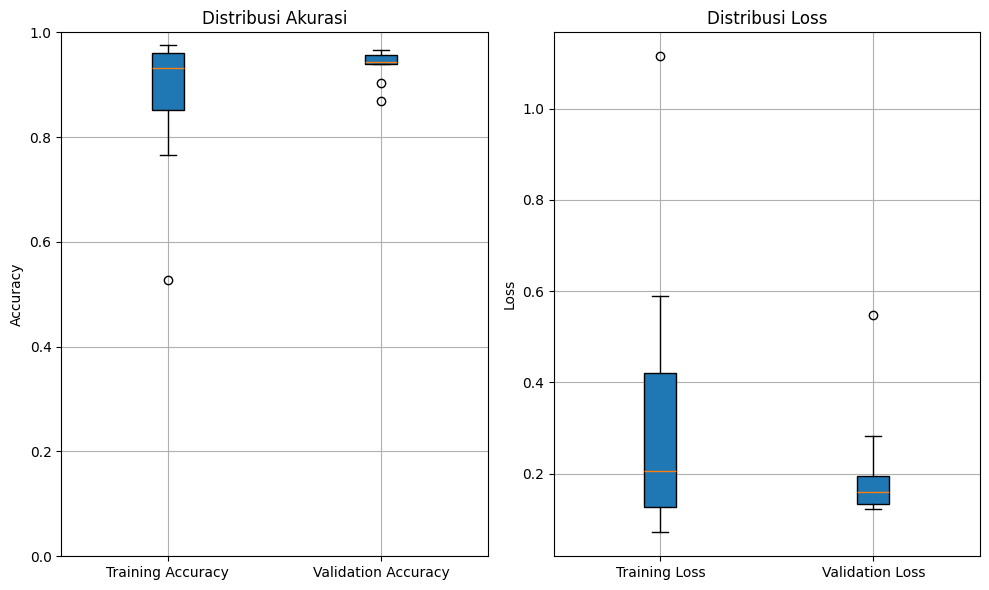


🚀 Training Fold 2 😌

Found 1846 validated image filenames belonging to 4 classes.
Found 462 validated image filenames belonging to 4 classes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 58/115 ━━━━━━━━━━━━━━━━━━━━ 2:10 2s/step - accuracy: 0.4979 - loss: 1.2585

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


115/115 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.5392 - loss: 1.1401 - val_accuracy: 0.8996 - val_loss: 0.4683 - learning_rate: 1.0000e-04
Epoch 2/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.7550 - loss: 0.6487 - val_accuracy: 0.9241 - val_loss: 0.2792 - learning_rate: 1.0000e-04
Epoch 3/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8181 - loss: 0.4633 - val_accuracy: 0.9286 - val_loss: 0.2252 - learning_rate: 1.0000e-04
Epoch 4/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.8817 - loss: 0.3284 - val_accuracy: 0.9397 - val_loss: 0.1789 - learning_rate: 1.0000e-04
Epoch 5/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.9095 - loss: 0.2669 - val_accuracy: 0.9665 - val_loss: 0.1488 - learning_rate: 1.0000e-04
Epoch 6/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9369 - loss: 0.1899 - val_accuracy: 0.9531 - val_loss: 0.1679 - learning_rate: 1.0000e-04
Epoch 7/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.94

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['accuracy'], history.history['val_accuracy']], vert=True, patch_artist=True,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['loss'], history.history['val_loss']], vert=True, patch_artist=True,


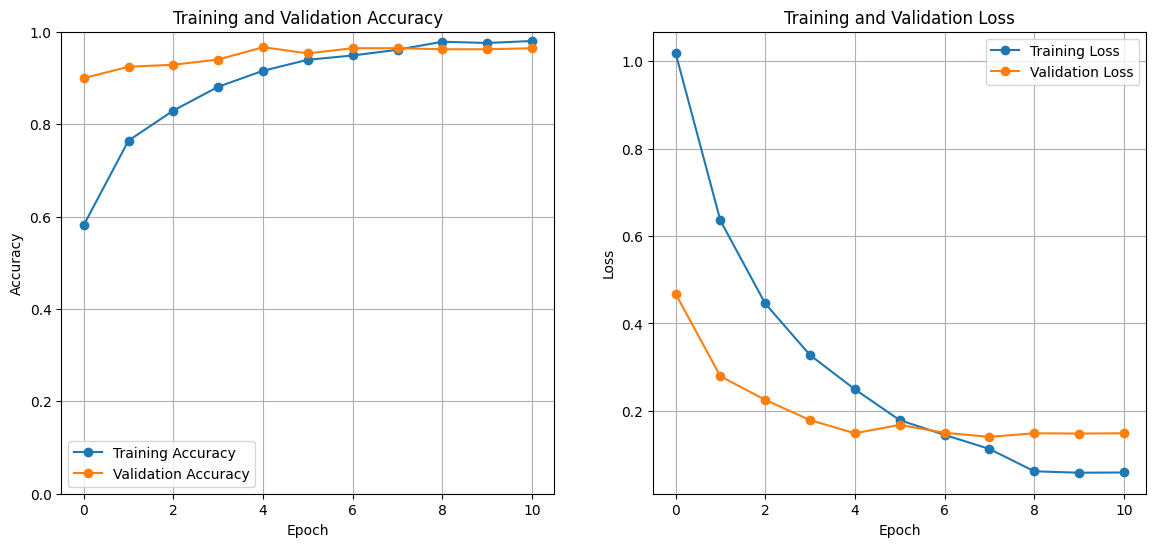

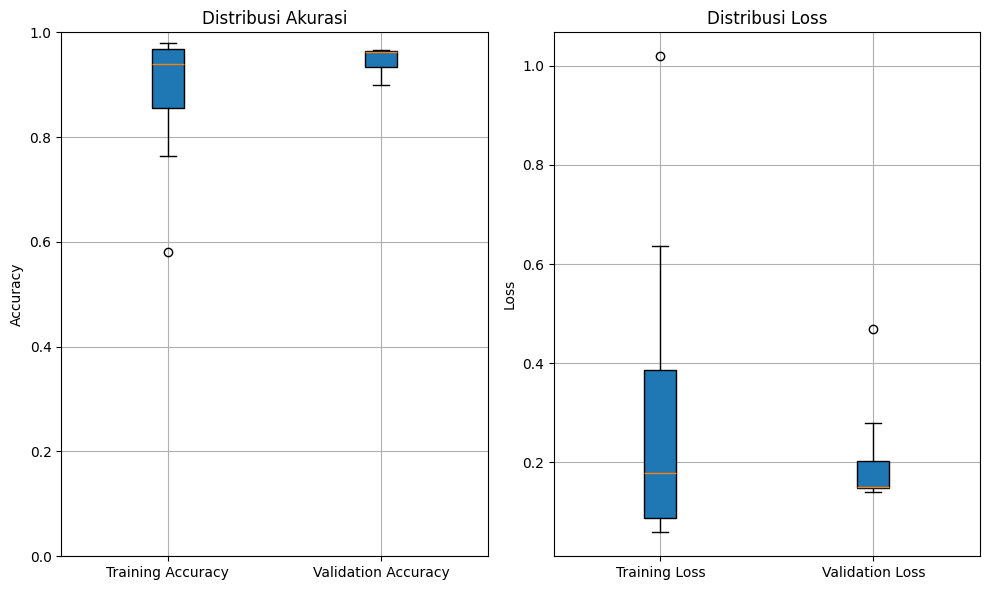


🚀 Training Fold 3 😌

Found 1846 validated image filenames belonging to 4 classes.
Found 462 validated image filenames belonging to 4 classes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 58/115 ━━━━━━━━━━━━━━━━━━━━ 1:56 2s/step - accuracy: 0.4465 - loss: 1.3470

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


115/115 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.4918 - loss: 1.2230 - val_accuracy: 0.8728 - val_loss: 0.4750 - learning_rate: 1.0000e-04
Epoch 2/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7410 - loss: 0.6624 - val_accuracy: 0.9040 - val_loss: 0.3158 - learning_rate: 1.0000e-04
Epoch 3/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 0.8423 - loss: 0.4466 - val_accuracy: 0.9174 - val_loss: 0.2248 - learning_rate: 1.0000e-04
Epoch 4/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.8863 - loss: 0.3335 - val_accuracy: 0.9375 - val_loss: 0.1769 - learning_rate: 1.0000e-04
Epoch 5/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.9159 - loss: 0.2400 - val_accuracy: 0.9442 - val_loss: 0.1950 - learning_rate: 1.0000e-04
Epoch 6/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9286 - loss: 0.2039 - val_accuracy: 0.9509 - val_loss: 0.1490 - learning_rate: 1.0000e-04
Epoch 7/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.95

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['accuracy'], history.history['val_accuracy']], vert=True, patch_artist=True,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['loss'], history.history['val_loss']], vert=True, patch_artist=True,


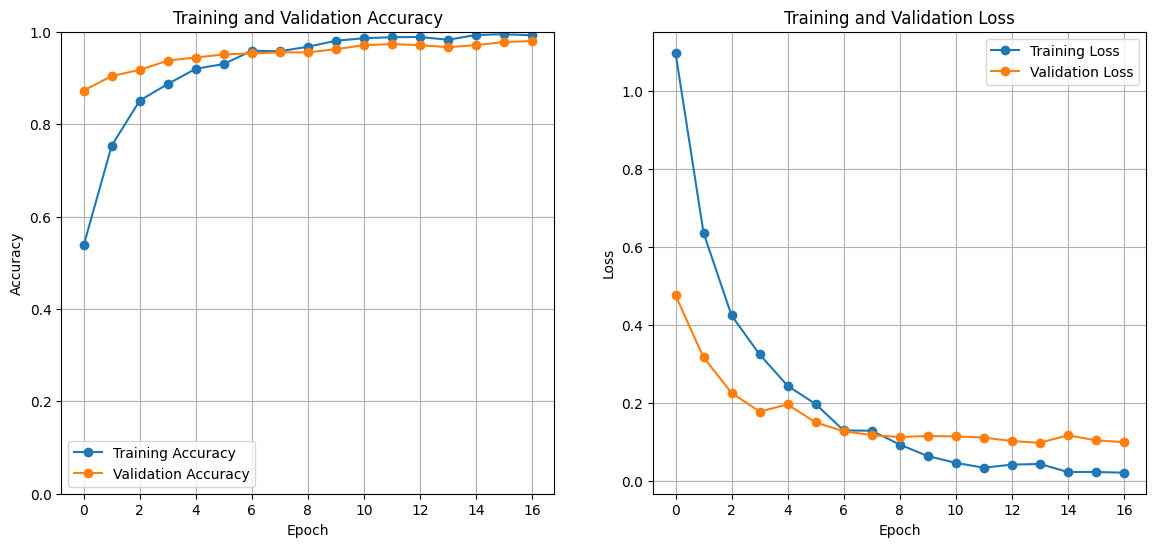

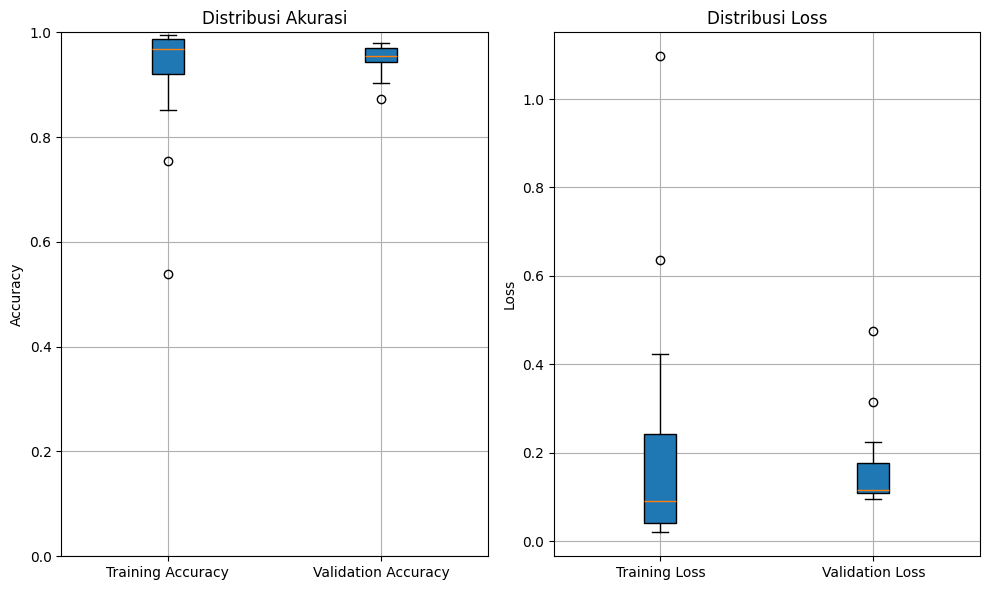


🚀 Training Fold 4 😌

Found 1847 validated image filenames belonging to 4 classes.
Found 461 validated image filenames belonging to 4 classes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 58/115 ━━━━━━━━━━━━━━━━━━━━ 1:59 2s/step - accuracy: 0.4605 - loss: 1.3075

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


115/115 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.5135 - loss: 1.1803 - val_accuracy: 0.8393 - val_loss: 0.5157 - learning_rate: 1.0000e-04
Epoch 2/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.7806 - loss: 0.6102 - val_accuracy: 0.9152 - val_loss: 0.2878 - learning_rate: 1.0000e-04
Epoch 3/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.8665 - loss: 0.3696 - val_accuracy: 0.9152 - val_loss: 0.2436 - learning_rate: 1.0000e-04
Epoch 4/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.8834 - loss: 0.3243 - val_accuracy: 0.9420 - val_loss: 0.1956 - learning_rate: 1.0000e-04
Epoch 5/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9246 - loss: 0.2271 - val_accuracy: 0.9464 - val_loss: 0.1494 - learning_rate: 1.0000e-04
Epoch 6/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9401 - loss: 0.1681 - val_accuracy: 0.9576 - val_loss: 0.1296 - learning_rate: 1.0000e-04
Epoch 7/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.95

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['accuracy'], history.history['val_accuracy']], vert=True, patch_artist=True,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['loss'], history.history['val_loss']], vert=True, patch_artist=True,


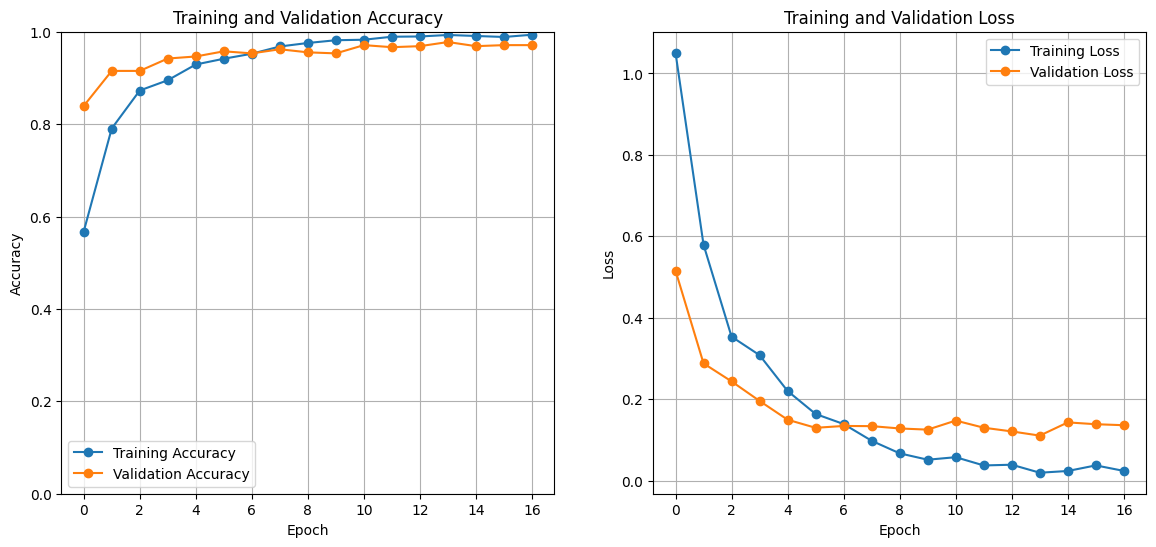

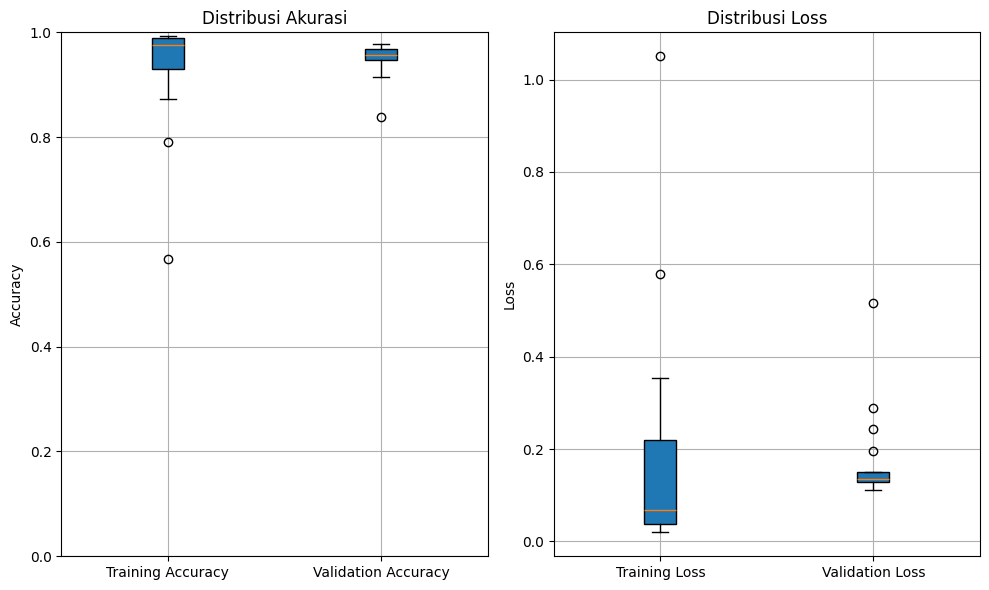


🚀 Training Fold 5 😌

Found 1847 validated image filenames belonging to 4 classes.
Found 461 validated image filenames belonging to 4 classes.


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 58/115 ━━━━━━━━━━━━━━━━━━━━ 2:18 2s/step - accuracy: 0.3684 - loss: 1.4685

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


115/115 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.4072 - loss: 1.3634 - val_accuracy: 0.8214 - val_loss: 0.7549 - learning_rate: 1.0000e-04
Epoch 2/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.6855 - loss: 0.7956 - val_accuracy: 0.8973 - val_loss: 0.4313 - learning_rate: 1.0000e-04
Epoch 3/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8107 - loss: 0.5324 - val_accuracy: 0.9397 - val_loss: 0.2216 - learning_rate: 1.0000e-04
Epoch 4/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.8564 - loss: 0.3856 - val_accuracy: 0.9397 - val_loss: 0.1835 - learning_rate: 1.0000e-04
Epoch 5/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9154 - loss: 0.2596 - val_accuracy: 0.9554 - val_loss: 0.1401 - learning_rate: 1.0000e-04
Epoch 6/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9267 - loss: 0.2125 - val_accuracy: 0.9598 - val_loss: 0.1107 - learning_rate: 1.0000e-04
Epoch 7/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.94

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['accuracy'], history.history['val_accuracy']], vert=True, patch_artist=True,
C:\Users\ASUS\AppData\Local\Temp\ipykernel_9284\1414416.py:132: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([history.history['loss'], history.history['val_loss']], vert=True, patch_artist=True,


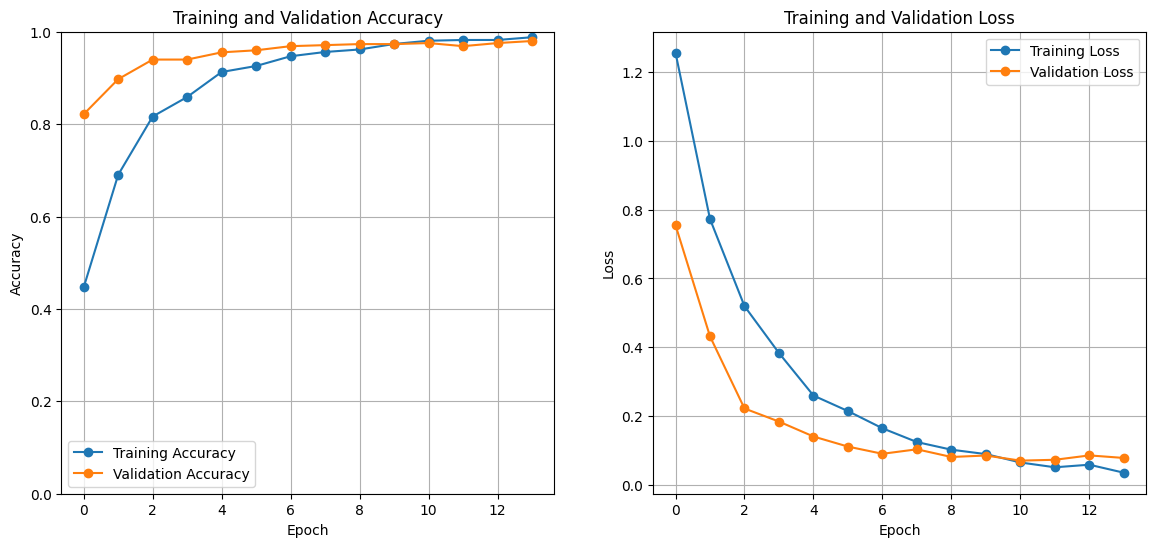

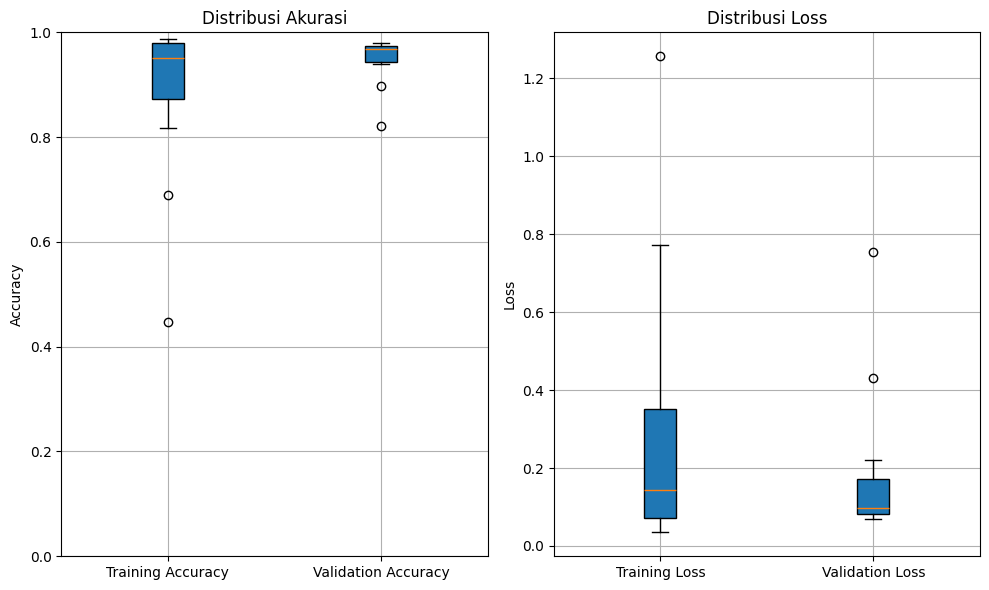

In [ ]:
# Implementasi Kfold
n_splits = 5
EPOCH = 25
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

best_model_dir = r'.\keras aug\zoom+rotate' 

# Fungsi untuk membuat model
def create_model(num_classes):
    base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, COLOR_CHANNELS))

    # Membekukan 596 layer awal dari DenseNet169
    for layer in base_model.layers[:-10]: 
        layer.trainable = False

    x = base_model.output
    x = Conv2D(32, (4, 4), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu', name='FC2')(x) 
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dropout(0.3)(x)

    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # model.summary()
    return model

fold_var = 1 # Inisialisasi variabel fold
for train_index, val_index in kf.split(file_paths):
    print(f"\n🚀 Training Fold {fold_var} 😌\n")

    # Split train and validation sets
    train_files, val_files = np.array(file_paths)[train_index], np.array(file_paths)[val_index]
    train_labels, val_labels = np.array(integer_labels)[train_index], np.array(integer_labels)[val_index]
    
    # Convert integer labels to class names
    df_train = pd.DataFrame({"filename": train_files, "class": [unique_labels[i] for i in train_labels]})
    df_val = pd.DataFrame({"filename": val_files, "class": [unique_labels[i] for i in val_labels]})


    train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,       # DataFrame yang berisi informasi gambar (filename dan class)
    x_col="filename",         # Kolom yang berisi path ke gambar
    y_col="class",            # Kolom yang berisi label kelas gambar
    target_size=IMAGE_SIZE,   # Ukuran gambar yang akan diubah sebelum masuk ke model
    batch_size=BATCH_SIZE,    # Jumlah gambar yang akan diproses dalam satu batch
    class_mode="categorical", # Mode klasifikasi (multikategori)
    color_mode="rgb",         # Format warna gambar (RGB)
    shuffle=True
    )
    
    val_generator = datagen.flow_from_dataframe(
        dataframe=df_val,
        x_col="filename",
        y_col="class",
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        color_mode="rgb",
        shuffle=True
    )

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
    model_checkpoint = ModelCheckpoint(os.path.join(best_model_dir, f'gabungan_model_{fold_var}.keras'), monitor='val_loss', save_best_only=True)
    
    # Buat Learning Rate Scheduler
    lr_scheduler = ReduceLROnPlateau(
        monitor='val_accuracy',     
        factor=0.1,             
        patience=3,             # Jika val_loss tidak membaik setelah 3 epoch, LR akan diturunkan
        min_lr=1e-6,            
        verbose=1               
    )

    num_classes = 4 
    model = create_model(num_classes) 

    # Training Model
    history = model.fit(
        train_generator,
        # steps_per_epoch=(2 * len(train_files)) // BATCH_SIZE,
        epochs=EPOCH,
        validation_data=val_generator,
        # validation_steps=len(val_files) // BATCH_SIZE,
        callbacks=[early_stopping, model_checkpoint, lr_scheduler]
    )

    # Plot grafik akurasi dan loss dengan format yang lebih baik
    plt.figure(figsize=(14, 6))

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Menentukan rentang y antara 0 dan 1 (untuk akurasi)
    plt.grid(True)
    plt.legend()

    # Plot Training and Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.legend()


    # Buat figure Box Plot
    plt.figure(figsize=(10, 6))
    
    # Boxplot untuk Training & Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.boxplot([history.history['accuracy'], history.history['val_accuracy']], vert=True, patch_artist=True,
                labels=['Training Accuracy', 'Validation Accuracy'])
    plt.title('Distribusi Akurasi')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    
    # Boxplot untuk Training & Validation Loss
    plt.subplot(1, 2, 2)
    plt.boxplot([history.history['loss'], history.history['val_loss']], vert=True, patch_artist=True,
                labels=['Training Loss', 'Validation Loss'])
    plt.title('Distribusi Loss')
    plt.ylabel('Loss')
    plt.grid(True)

    # Tampilkan grafik
    plt.tight_layout()
    plt.show()

    fold_var += 1




Kfold 1 ...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step


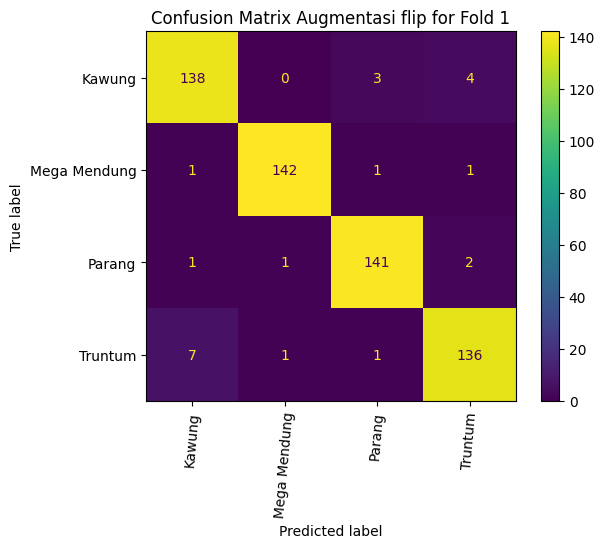

Classification Report
              precision    recall  f1-score   support

      Kawung     0.9388    0.9517    0.9452       145
Mega Mendung     0.9861    0.9793    0.9827       145
      Parang     0.9658    0.9724    0.9691       145
     Truntum     0.9510    0.9379    0.9444       145

    accuracy                         0.9603       580
   macro avg     0.9604    0.9603    0.9604       580
weighted avg     0.9604    0.9603    0.9604       580




Kfold 2 ...
19/19 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step


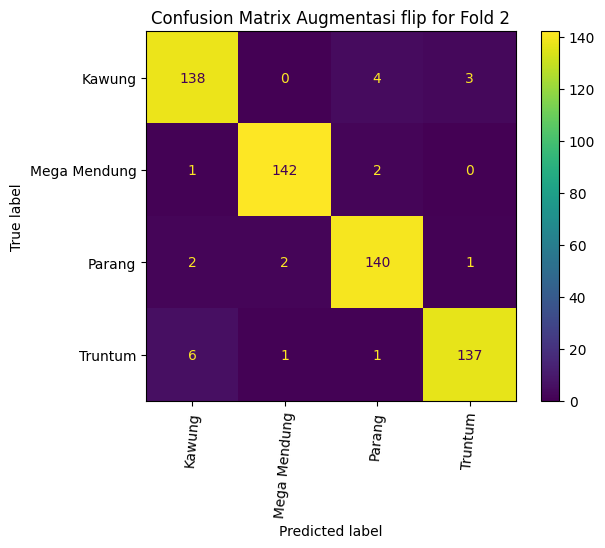

Classification Report
              precision    recall  f1-score   support

      Kawung     0.9388    0.9517    0.9452       145
Mega Mendung     0.9793    0.9793    0.9793       145
      Parang     0.9524    0.9655    0.9589       145
     Truntum     0.9716    0.9448    0.9580       145

    accuracy                         0.9603       580
   macro avg     0.9605    0.9603    0.9604       580
weighted avg     0.9605    0.9603    0.9604       580




Kfold 3 ...
19/19 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step


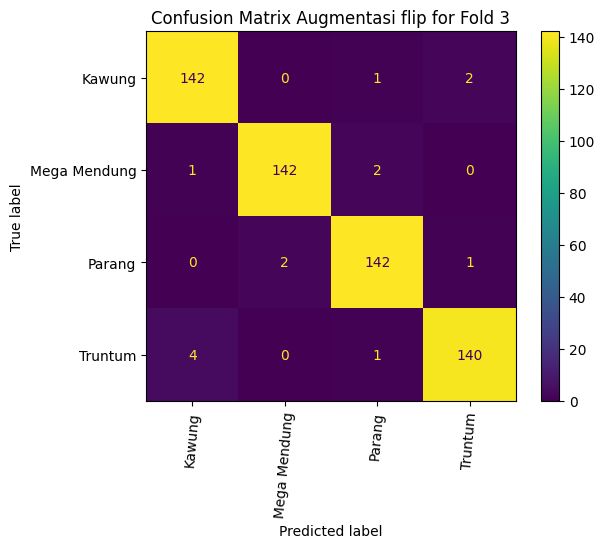

Classification Report
              precision    recall  f1-score   support

      Kawung     0.9660    0.9793    0.9726       145
Mega Mendung     0.9861    0.9793    0.9827       145
      Parang     0.9726    0.9793    0.9759       145
     Truntum     0.9790    0.9655    0.9722       145

    accuracy                         0.9759       580
   macro avg     0.9759    0.9759    0.9759       580
weighted avg     0.9759    0.9759    0.9759       580




Kfold 4 ...
19/19 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step


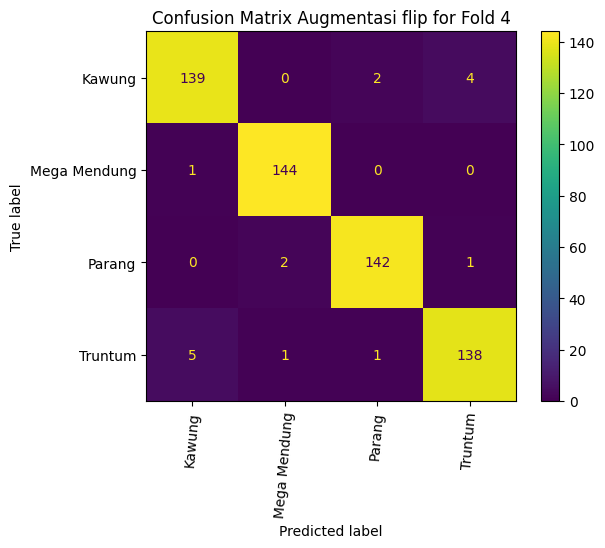

Classification Report
              precision    recall  f1-score   support

      Kawung     0.9586    0.9586    0.9586       145
Mega Mendung     0.9796    0.9931    0.9863       145
      Parang     0.9793    0.9793    0.9793       145
     Truntum     0.9650    0.9517    0.9583       145

    accuracy                         0.9707       580
   macro avg     0.9706    0.9707    0.9706       580
weighted avg     0.9706    0.9707    0.9706       580




Kfold 5 ...
19/19 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step


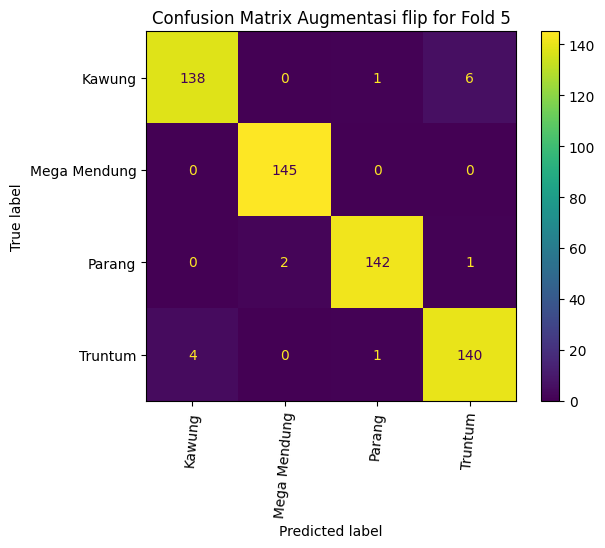

Classification Report
              precision    recall  f1-score   support

      Kawung     0.9718    0.9517    0.9617       145
Mega Mendung     0.9864    1.0000    0.9932       145
      Parang     0.9861    0.9793    0.9827       145
     Truntum     0.9524    0.9655    0.9589       145

    accuracy                         0.9741       580
   macro avg     0.9742    0.9741    0.9741       580
weighted avg     0.9742    0.9741    0.9741       580



In [7]:
def evaluate_model(fold_count, test_generator, model_path='./keras aug/zoom+rotate/gabungan_model_'):
    for fold in range(1, fold_count + 1):
        print('\n\n')
        print(f"Kfold {fold} ...")
        loaded_model = load_model(f'{model_path}{fold}.keras')
        
        predictions = loaded_model.predict(test_generator)
        
        # Get class labels
        class_labels = list(test_generator.class_indices.keys())
        
        # Get the true and predicted class indices
        y_true = test_generator.classes
        y_pred = np.argmax(predictions, axis=1)
        
        # Confusion Matrix Display
        conf_matrix = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
        
        disp.plot(cmap='viridis')
        plt.title(f'Confusion Matrix Augmentasi flip for Fold {fold}')
        plt.xticks(rotation=85)
        plt.show()
        
        class_report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
        print('Classification Report')
        print(class_report)

evaluate_model(fold_count=5, test_generator=test_generator)




Evaluasi KFold 1 ...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step
Skor AUC (macro-average) untuk Fold 1: 0.9959


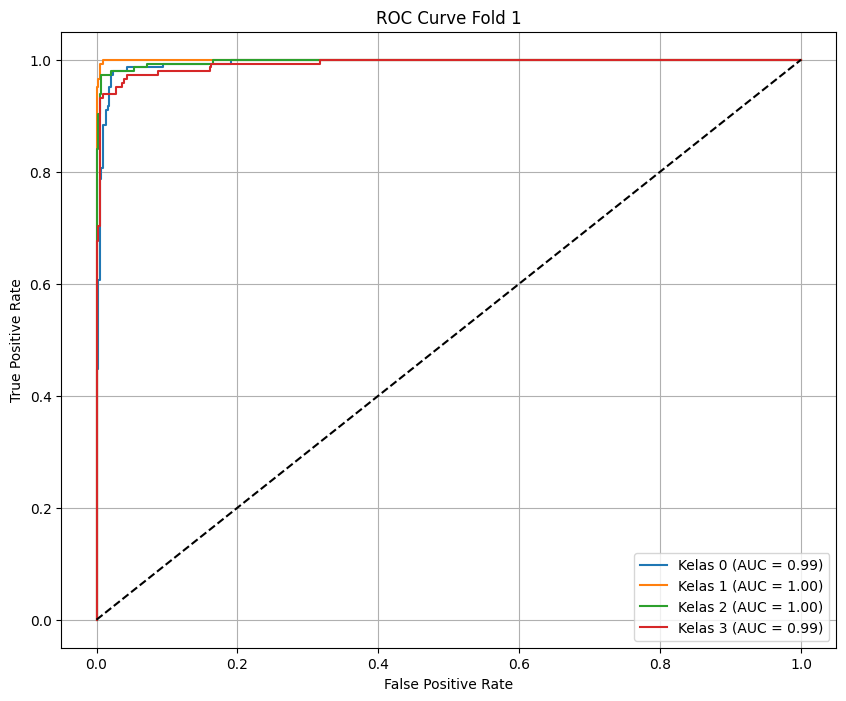




Evaluasi KFold 2 ...
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step
Skor AUC (macro-average) untuk Fold 2: 0.9967


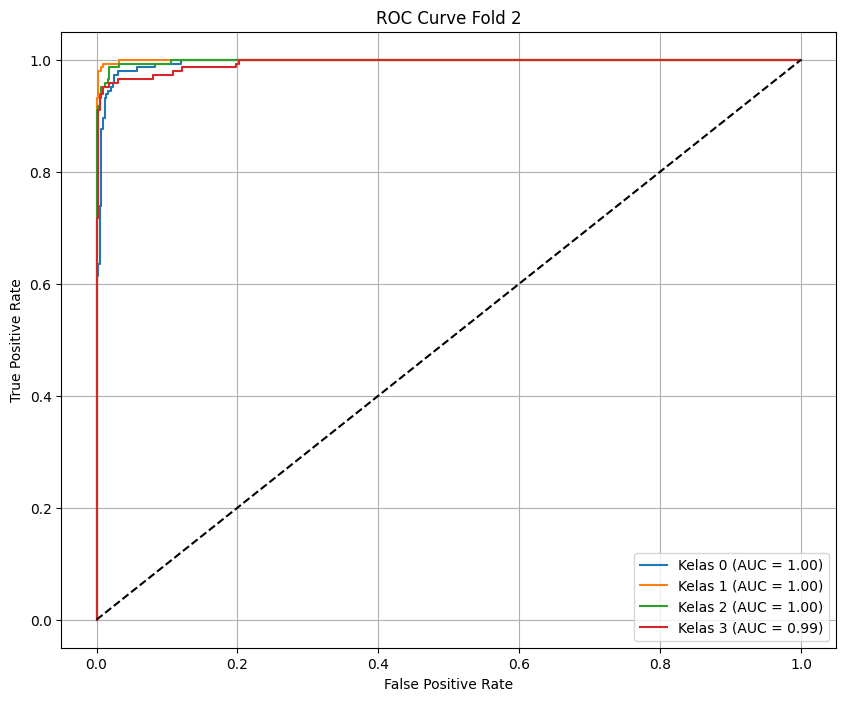




Evaluasi KFold 3 ...
19/19 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step
Skor AUC (macro-average) untuk Fold 3: 0.9966


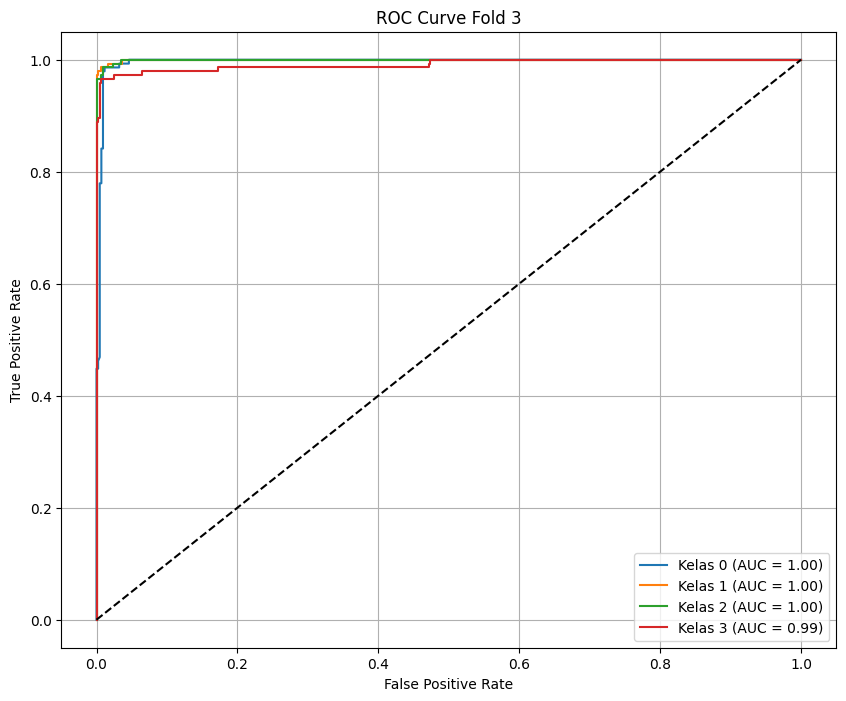




Evaluasi KFold 4 ...
19/19 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step
Skor AUC (macro-average) untuk Fold 4: 0.9980


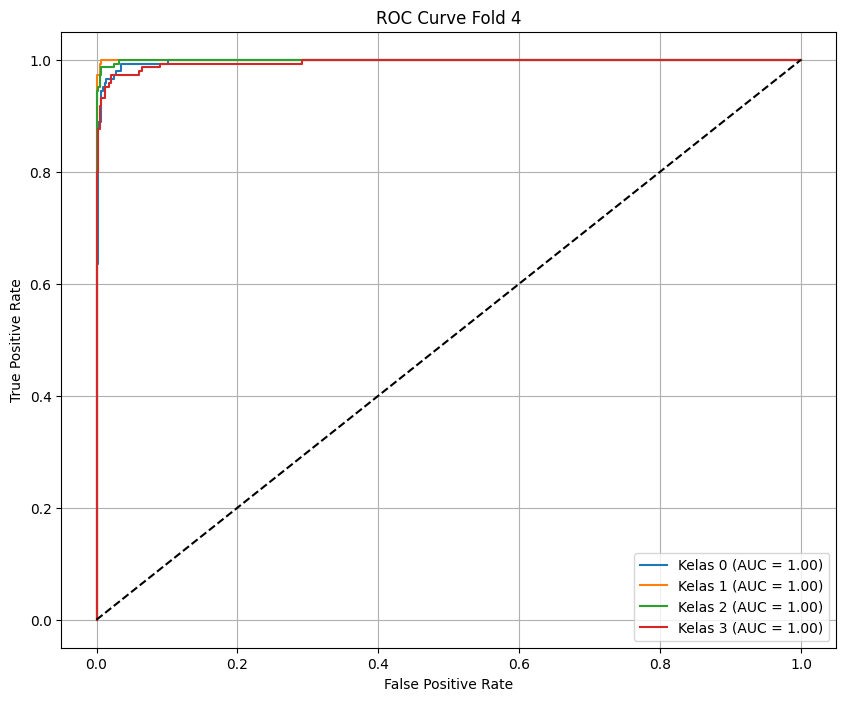




Evaluasi KFold 5 ...
19/19 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step
Skor AUC (macro-average) untuk Fold 5: 0.9978


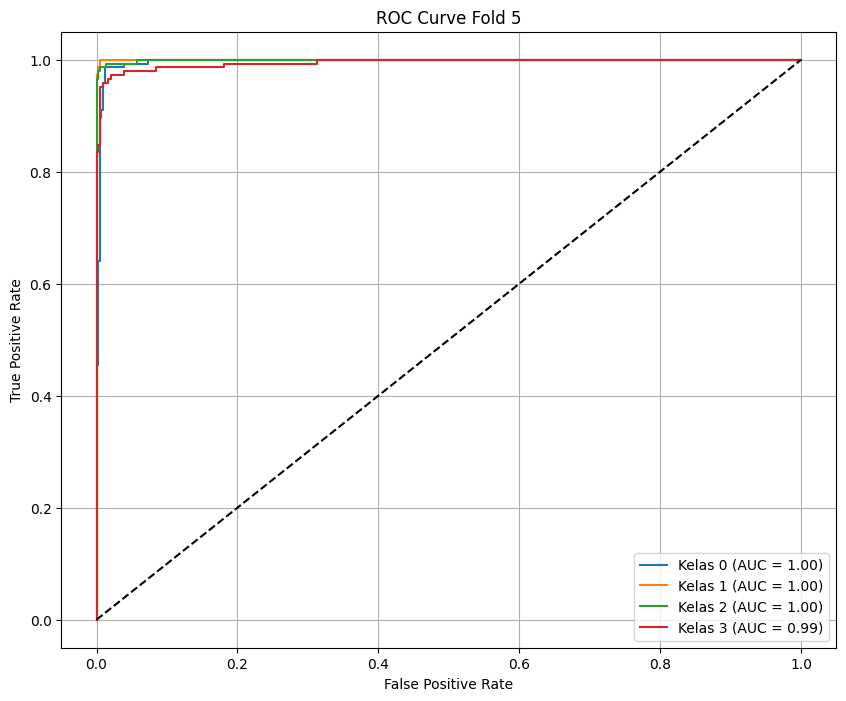

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

def evaluate_model(fold_count, test_generator, model_path='./keras aug/zoom+rotate/gabungan_model_'):
    for fold in range(1, fold_count + 1):
        print('\n\n')
        print(f"Evaluasi KFold {fold} ...")
        
        # Load model
        loaded_model = load_model(f'{model_path}{fold}.keras')

        # Prediksi pada data testing
        predictions = loaded_model.predict(test_generator)

        # Ambil label sebenarnya dari generator
        true_labels = test_generator.classes
        
        # Konversi label ke bentuk one-hot
        num_classes = predictions.shape[1]
        y_true = label_binarize(true_labels, classes=range(num_classes))
        
        # Hitung skor AUC macro
        auc_score = roc_auc_score(y_true, predictions, average='macro', multi_class='ovr')
        print(f"Skor AUC (macro-average) untuk Fold {fold}: {auc_score:.4f}")

        # Plot ROC Curve untuk setiap kelas
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot semua ROC dalam 1 grafik
        plt.figure(figsize=(10, 8))
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label=f'Kelas {i} (AUC = {roc_auc[i]:.2f})')

        plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal random guess
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve Fold {fold}')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()

evaluate_model(fold_count=5, test_generator=test_generator)